#### Performing Objective 3 -> To predict employees at the risk of under performance which leads to employee attrition
#### Use past and present employee information to predict which workers are likely to start underperforming soon. This lets managers take action early—such as offering training or support—before the person’s performance drops further or they decide to leave

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px


# Preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import train_test_split, cross_val_score

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilities
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ibm_dataset = pd.read_csv('./dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

hr_job_dataset = pd.read_csv('./dataset/HR_comma_sep.csv')

emp_attrition_dataset = pd.read_csv('./dataset/employee_attrition_data.csv')

In [3]:
## loading the ibm_dataset

ibm_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
## loading the hr_job_dataset

hr_job_dataset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
## dropping the cols from the dataset which is irrelevant for the current use case

hr_job_dataset = hr_job_dataset.drop(['number_project', 'Work_accident'], axis=1)

In [6]:
hr_job_dataset.head(10)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,sales,low
1,0.80,0.86,262,6,1,0,sales,medium
2,0.11,0.88,272,4,1,0,sales,medium
3,0.72,0.87,223,5,1,0,sales,low
4,0.37,0.52,159,3,1,0,sales,low
5,0.41,0.50,153,3,1,0,sales,low
6,0.10,0.77,247,4,1,0,sales,low
7,0.92,0.85,259,5,1,0,sales,low
8,0.89,1.00,224,5,1,0,sales,low
9,0.42,0.53,142,3,1,0,sales,low


In [7]:
## filtering the dataset based on only 3 departments -> HR, Sales and R&D to keep the data uniform

selected_depts = ['sales', 'hr', 'RandD']
hr_job_filtered_df = hr_job_dataset[hr_job_dataset['Department'].isin(selected_depts)]

In [8]:
### printing the filtered df

hr_job_filtered_df.head(15)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,sales,low
1,0.80,0.86,262,6,1,0,sales,medium
2,0.11,0.88,272,4,1,0,sales,medium
3,0.72,0.87,223,5,1,0,sales,low
4,0.37,0.52,159,3,1,0,sales,low
5,0.41,0.50,153,3,1,0,sales,low
6,0.10,0.77,247,4,1,0,sales,low
7,0.92,0.85,259,5,1,0,sales,low
8,0.89,1.00,224,5,1,0,sales,low
9,0.42,0.53,142,3,1,0,sales,low


In [9]:
hr_job_filtered_df['Department'].value_counts()

Department
sales    4140
RandD     787
hr        739
Name: count, dtype: int64

In [10]:
hr_job_filtered_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,5666.0,0.613154,0.249288,0.09,0.44,0.64,0.82,1.0
last_evaluation,5666.0,0.709938,0.170975,0.36,0.55,0.71,0.86,1.0
average_montly_hours,5666.0,200.605542,49.620550,96.00,156.00,200.00,245.00,310.0
time_spend_company,5666.0,3.487646,1.435131,2.00,3.00,3.00,4.00,10.0
left,5666.0,0.238263,0.426059,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,5666.0,0.025062,0.156327,0.00,0.00,0.00,0.00,1.0


In [11]:
## Renaming the department values


hr_job_filtered_df['Department'] = hr_job_filtered_df['Department'].replace({
    'sales': 'Sales',
    'hr': 'Human Resources',
    'RandD': 'Research & Development'
})

hr_job_filtered_df['Department'].value_counts()

Department
Sales                     4140
Research & Development     787
Human Resources            739
Name: count, dtype: int64

In [12]:
## Renaming the satisfaction_level to JobSatisfactionLevel

hr_job_filtered_df = hr_job_filtered_df.rename(columns={'satisfaction_level': 'JobSatisfaction'})
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,Sales,low
1,0.80,0.86,262,6,1,0,Sales,medium
2,0.11,0.88,272,4,1,0,Sales,medium
3,0.72,0.87,223,5,1,0,Sales,low
4,0.37,0.52,159,3,1,0,Sales,low
5,0.41,0.50,153,3,1,0,Sales,low
6,0.10,0.77,247,4,1,0,Sales,low
7,0.92,0.85,259,5,1,0,Sales,low
8,0.89,1.00,224,5,1,0,Sales,low
9,0.42,0.53,142,3,1,0,Sales,low


In [13]:
### applying a logic of filtering condition for the job satisfaction level because it has to match the ibm dataset 

### To achieve -> 1 => "Low", 2 => "Medium", 3 => "High", 4 => "Very High"
### Criteria to apply -> <0.30 => Low, <0.50 => Medium , <0.80 => High, > 0.80 => Very High

def filtering_condition_job_satisfaction(val):
  if val < 0.35:
    return 1
  elif val >= 0.30 and val < 0.50:
    return 2
  elif val >= 0.50 and val < 0.80:
    return 3
  else:
    return 4

hr_job_filtered_df["JobSatisfaction"] = hr_job_filtered_df["JobSatisfaction"].apply(lambda x: filtering_condition_job_satisfaction(x))

In [14]:
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,2,0.53,157,3,1,0,Sales,low
1,4,0.86,262,6,1,0,Sales,medium
2,1,0.88,272,4,1,0,Sales,medium
3,3,0.87,223,5,1,0,Sales,low
4,2,0.52,159,3,1,0,Sales,low
5,2,0.50,153,3,1,0,Sales,low
6,1,0.77,247,4,1,0,Sales,low
7,4,0.85,259,5,1,0,Sales,low
8,4,1.00,224,5,1,0,Sales,low
9,2,0.53,142,3,1,0,Sales,low


In [15]:
## Renaming the coln name time_spend_company to YearsAtCompany
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'time_spend_company': 'YearsAtCompany'})


In [16]:
## changing the col name 'left' to Attrition name
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'left': 'Attrition'})

In [17]:
hr_job_filtered_df['Attrition'] = hr_job_filtered_df['Attrition'].replace({
    1: 'Yes',
    0: 'No'
})

In [18]:
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,YearsAtCompany,Attrition,promotion_last_5years,Department,salary
0,2,0.53,157,3,Yes,0,Sales,low
1,4,0.86,262,6,Yes,0,Sales,medium
2,1,0.88,272,4,Yes,0,Sales,medium
3,3,0.87,223,5,Yes,0,Sales,low
4,2,0.52,159,3,Yes,0,Sales,low
5,2,0.50,153,3,Yes,0,Sales,low
6,1,0.77,247,4,Yes,0,Sales,low
7,4,0.85,259,5,Yes,0,Sales,low
8,4,1.00,224,5,Yes,0,Sales,low
9,2,0.53,142,3,Yes,0,Sales,low


In [19]:
## renaming the last_evaluation to PerformanceRating

hr_job_filtered_df = hr_job_filtered_df.rename(columns={'last_evaluation': 'PerformanceRating'})

### To achieve -> 1 => "Low", 2 => "Good", 3 => "Excellent", 4 => "Outstanding"
### Criteria to apply -> <0.30 => Low, <0.50 => Good , <0.80 => Excellent, > 0.80 => Outstanding

def filtering_condition_last_evaluation(val):
  if val < 0.35:
    return 1
  elif val >= 0.30 and val < 0.50:
    return 2
  elif val >= 0.50 and val < 0.80:
    return 3
  else:
    return 4

hr_job_filtered_df["PerformanceRating"] = hr_job_filtered_df["PerformanceRating"].apply(lambda x: filtering_condition_last_evaluation(x))
hr_job_filtered_df.head(10)

,JobSatisfaction,PerformanceRating,average_montly_hours,YearsAtCompany,Attrition,promotion_last_5years,Department,salary
0,2,3,157,3,Yes,0,Sales,low
1,4,4,262,6,Yes,0,Sales,medium
2,1,4,272,4,Yes,0,Sales,medium
3,3,4,223,5,Yes,0,Sales,low
4,2,3,159,3,Yes,0,Sales,low
5,2,3,153,3,Yes,0,Sales,low
6,1,3,247,4,Yes,0,Sales,low
7,4,4,259,5,Yes,0,Sales,low
8,4,4,224,5,Yes,0,Sales,low
9,2,3,142,3,Yes,0,Sales,low


In [20]:
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'promotion_last_5years': 'YearsSinceLastPromotion'})

def filtering_condition_for_promotion(val):
  if val == 0:
    return 0
  else: 
    return 5
  
hr_job_filtered_df["YearsSinceLastPromotion"] = hr_job_filtered_df["YearsSinceLastPromotion"].apply(lambda x: filtering_condition_for_promotion(x))

In [21]:
salary_stats = ibm_dataset['MonthlyIncome'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])
print(salary_stats)

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
95%      17821.350000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [22]:
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'salary':'MonthlyIncome'})

def categorize_salary_based_on_categorical(val):
  if val == 'low':
    return salary_stats['50%']
  elif val == 'medium':
    return salary_stats['75%']
  else:
    return salary_stats['95%']
  
hr_job_filtered_df['MonthlyIncome'] = hr_job_filtered_df['MonthlyIncome'].apply(lambda x : categorize_salary_based_on_categorical(x))


In [23]:
hr_job_filtered_df.head(10)

,JobSatisfaction,PerformanceRating,average_montly_hours,YearsAtCompany,Attrition,YearsSinceLastPromotion,Department,MonthlyIncome
0,2,3,157,3,Yes,0,Sales,4919.0
1,4,4,262,6,Yes,0,Sales,8379.0
2,1,4,272,4,Yes,0,Sales,8379.0
3,3,4,223,5,Yes,0,Sales,4919.0
4,2,3,159,3,Yes,0,Sales,4919.0
5,2,3,153,3,Yes,0,Sales,4919.0
6,1,3,247,4,Yes,0,Sales,4919.0
7,4,4,259,5,Yes,0,Sales,4919.0
8,4,4,224,5,Yes,0,Sales,4919.0
9,2,3,142,3,Yes,0,Sales,4919.0


In [24]:
def calculate_rate(salary, monthly_hrs):
  no_of_working_days = 22
  working_hrs_per_day = 8
  hrs_per_month = monthly_hrs
  monthly_salary = salary
  
  hrly_rate = monthly_salary / hrs_per_month
  daily_rate = hrly_rate * working_hrs_per_day
  monthly_rate = int(daily_rate * no_of_working_days)
  hrly_rate = int(hrly_rate)
  daily_rate = int(daily_rate)
  
  return [hrly_rate, daily_rate, monthly_rate]

rates_df = pd.DataFrame(
  hr_job_filtered_df.apply(lambda x :  calculate_rate(x['MonthlyIncome'], x['average_montly_hours']), axis=1).tolist(),
  columns=['HourlyRate', 'DailyRate', 'MonthlyRate'],
  index=hr_job_filtered_df.index
)

hr_job_filtered_df = pd.concat([hr_job_filtered_df, rates_df], axis=1)

In [25]:
hr_job_filtered_df.drop(['average_montly_hours'], axis=1, inplace=True)

In [26]:
combined_dataset = pd.concat([ibm_dataset, hr_job_filtered_df], ignore_index=True)
combined_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6,4.0,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10,7.0,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0,0.0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8,7.0,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2,2.0,2,2.0
5,32.0,No,Travel_Frequently,1005,Research & Development,2.0,2.0,Life Sciences,1.0,8.0,...,3.0,80.0,0.0,8.0,2.0,2.0,7,7.0,3,6.0
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3.0,Medical,1.0,10.0,...,1.0,80.0,3.0,12.0,3.0,2.0,1,0.0,0,0.0
7,30.0,No,Travel_Rarely,1358,Research & Development,24.0,1.0,Life Sciences,1.0,11.0,...,2.0,80.0,1.0,1.0,2.0,3.0,1,0.0,0,0.0
8,38.0,No,Travel_Frequently,216,Research & Development,23.0,3.0,Life Sciences,1.0,12.0,...,2.0,80.0,0.0,10.0,2.0,3.0,9,7.0,1,8.0
9,36.0,No,Travel_Rarely,1299,Research & Development,27.0,3.0,Medical,1.0,13.0,...,2.0,80.0,2.0,17.0,3.0,2.0,7,7.0,7,7.0


In [27]:
combined_dataset.isnull().sum()

Age                         5666
Attrition                      0
BusinessTravel              5666
DailyRate                      0
Department                     0
DistanceFromHome            5666
Education                   5666
EducationField              5666
EmployeeCount               5666
EmployeeNumber              5666
EnvironmentSatisfaction     5666
Gender                      5666
HourlyRate                     0
JobInvolvement              5666
JobLevel                    5666
JobRole                     5666
JobSatisfaction                0
MaritalStatus               5666
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked          5666
Over18                      5666
OverTime                    5666
PercentSalaryHike           5666
PerformanceRating              0
RelationshipSatisfaction    5666
StandardHours               5666
StockOptionLevel            5666
TotalWorkingYears           5666
TrainingTimesLastYear       5666
WorkLifeBa

In [28]:
combined_dataset = combined_dataset.interpolate()

def over18_calculation(age):
  if combined_dataset[age] > 18.0:
    return 'Y'
  else: return 'N'
  
combined_dataset['Over18'] = combined_dataset.apply(lambda x: over18_calculation('Age') if math.isnan(x['Age']) else x['Age'], axis=1)




In [29]:
combined_dataset.value_counts().sum()

np.int64(1470)

In [30]:
## dropping the duplicates

combined_dataset = combined_dataset.drop_duplicates()
combined_dataset.duplicated().sum()

np.int64(0)

In [31]:
emp_attrition_dataset.head(10)

,Employee ID,Age,Gender,Marital Status,Department,Job Role,Salary,Performance Rating,Years at Company,Promotion Count,Work-Life Balance Rating,Job Satisfaction,Training Hours,Commute Distance,Absenteeism Rate,Exit Interview Feedback,Reason for Leaving,Company Culture Fit,Team Dynamics,Company Loyalty
0,E00000,55,Male,Single,Sales,Developer,67792.37,5,27,5,3,3,27,37.56,97.24,Billion but remain beyond music right.,Relocation,3,1,4
1,E00001,59,Male,Widowed,Sales,Manager,78919.79,2,14,0,1,4,11,31.78,32.96,Fight series budget beat specific stock.,Personal Reasons,4,3,2
2,E00002,40,Prefer not to say,Divorced,Finance,Analyst,77797.18,4,20,2,1,5,27,5.97,59.32,Process sort later first price.,Personal Reasons,2,5,4
3,E00003,21,Non-binary,Married,Finance,Analyst,119321.43,2,18,4,1,2,37,2.79,0.65,Animal represent whom car expect thank skin.,Career Change,5,5,1
4,E00004,50,Non-binary,Single,HR,Analyst,77904.07,5,24,2,3,4,23,29.97,0.53,Writer plant none song.,Retirement,4,5,2
5,E00005,28,Female,Widowed,HR,Analyst,79497.14,2,17,3,1,5,19,13.53,74.02,Machine throughout check they fine.,Layoff,1,1,1
6,E00006,60,Non-binary,Married,Sales,Sales Rep,58970.88,4,37,5,2,3,35,27.82,9.04,Kid only wall message.,Layoff,3,2,5
7,E00007,37,Prefer not to say,Divorced,HR,Sales Rep,88149.50,4,6,0,3,4,17,36.69,6.11,Two surface produce upon administration rememb...,Retirement,3,5,1
8,E00008,20,Female,Single,Sales,Sales Rep,103938.22,4,38,3,4,3,20,12.12,9.16,Future while at conference.,Personal Reasons,3,5,3
9,E00009,65,Female,Single,Operations,Team Lead,95740.81,4,32,4,2,4,1,19.89,6.68,Air whole very add.,Layoff,2,2,4


In [32]:
emp_attrition_dataset = emp_attrition_dataset.drop(['Employee ID', 'Team Dynamics', 'Company Loyalty'], axis=1)

emp_attrition_dataset = emp_attrition_dataset.rename(columns={
  'Job Role': 'JobRole', 
  'Years at Company': 'YearsAtCompany',
  'Marital Status': 'MaritalStatus',
  'Salary':'MonthlyIncome',
  'Performance Rating': 'PerformanceRating',
  'Work-Life Balance Rating': 'WorkLifeBalance',
  'Job Satisfaction': 'JobSatisfaction',
  'Training Hours': 'TrainingTimesLastYear',
  'Commute Distance' : 'DistanceFromHome',
  'Company Culture Fit': 'RelationshipSatisfaction'
})

In [33]:
def calculate_rate_with_no_monthly_hrs(salary, absenteesim_rate):
  no_of_working_days = 22
  working_hrs_per_day = 8
  monthly_salary = salary
  
  total_working_days_per_year = no_of_working_days * 12
  effective_working_days_per_year = total_working_days_per_year * (1-absenteesim_rate / 100)
  effective_working_days_per_month = effective_working_days_per_year / 12
  
  effective_hours_per_month = effective_working_days_per_month * working_hrs_per_day
  
  effective_hours_per_month = max(1.0 , effective_hours_per_month)
  
  hrly_rate = monthly_salary / effective_hours_per_month
  daily_rate = hrly_rate * working_hrs_per_day
  monthly_rate = int(daily_rate * effective_working_days_per_month)
  hrly_rate = int(hrly_rate)
  daily_rate = int(daily_rate)
  
  return [hrly_rate, daily_rate, monthly_rate]

rates_df = pd.DataFrame(
  emp_attrition_dataset.apply(lambda x :  calculate_rate_with_no_monthly_hrs(x['MonthlyIncome'], x['Absenteeism Rate']), axis=1).tolist(),
  columns=['HourlyRate', 'DailyRate', 'MonthlyRate'],
  index=emp_attrition_dataset.index
)

emp_attrition_dataset = pd.concat([emp_attrition_dataset, rates_df], axis=1)

In [34]:
emp_attrition_dataset= emp_attrition_dataset.drop(['Absenteeism Rate'], axis=1)
emp_attrition_dataset.head(10)

,Age,Gender,MaritalStatus,Department,JobRole,MonthlyIncome,PerformanceRating,YearsAtCompany,Promotion Count,WorkLifeBalance,JobSatisfaction,TrainingTimesLastYear,DistanceFromHome,Exit Interview Feedback,Reason for Leaving,RelationshipSatisfaction,HourlyRate,DailyRate,MonthlyRate
0,55,Male,Single,Sales,Developer,67792.37,5,27,5,3,3,27,37.56,Billion but remain beyond music right.,Relocation,3,13955,111647,67792
1,59,Male,Widowed,Sales,Manager,78919.79,2,14,0,1,4,11,31.78,Fight series budget beat specific stock.,Personal Reasons,4,668,5350,78919
2,40,Prefer not to say,Divorced,Finance,Analyst,77797.18,4,20,2,1,5,27,5.97,Process sort later first price.,Personal Reasons,2,1086,8692,77797
3,21,Non-binary,Married,Finance,Analyst,119321.43,2,18,4,1,2,37,2.79,Animal represent whom car expect thank skin.,Career Change,5,682,5459,119321
4,50,Non-binary,Single,HR,Analyst,77904.07,5,24,2,3,4,23,29.97,Writer plant none song.,Retirement,4,444,3559,77904
5,28,Female,Widowed,HR,Analyst,79497.14,2,17,3,1,5,19,13.53,Machine throughout check they fine.,Layoff,1,1738,13908,79497
6,60,Non-binary,Married,Sales,Sales Rep,58970.88,4,37,5,2,3,35,27.82,Kid only wall message.,Layoff,3,368,2946,58970
7,37,Prefer not to say,Divorced,HR,Sales Rep,88149.50,4,6,0,3,4,17,36.69,Two surface produce upon administration rememb...,Retirement,3,533,4267,88149
8,20,Female,Single,Sales,Sales Rep,103938.22,4,38,3,4,3,20,12.12,Future while at conference.,Personal Reasons,3,650,5200,103938
9,65,Female,Single,Operations,Team Lead,95740.81,4,32,4,2,4,1,19.89,Air whole very add.,Layoff,2,582,4663,95740


In [35]:
combined_dataset = pd.concat([combined_dataset, emp_attrition_dataset], ignore_index=True)
combined_dataset.isnull().sum()

Age                              0
Attrition                   100000
BusinessTravel              103851
DailyRate                        0
Department                       0
DistanceFromHome                 0
Education                   100000
EducationField              103851
EmployeeCount               100000
EmployeeNumber              100000
EnvironmentSatisfaction     100000
Gender                        3851
HourlyRate                       0
JobInvolvement              100000
JobLevel                    100000
JobRole                       3851
JobSatisfaction                  0
MaritalStatus                 3851
MonthlyIncome                    0
MonthlyRate                      0
NumCompaniesWorked          100000
Over18                      100000
OverTime                    103851
PercentSalaryHike           100000
PerformanceRating                0
RelationshipSatisfaction         0
StandardHours               100000
StockOptionLevel            100000
TotalWorkingYears   

In [36]:
categorical_cols = combined_dataset.select_dtypes(include='object').columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Exit Interview Feedback',
       'Reason for Leaving'],
      dtype='object')

In [37]:
combined_dataset.isnull().sum()

Age                              0
Attrition                   100000
BusinessTravel              103851
DailyRate                        0
Department                       0
DistanceFromHome                 0
Education                   100000
EducationField              103851
EmployeeCount               100000
EmployeeNumber              100000
EnvironmentSatisfaction     100000
Gender                        3851
HourlyRate                       0
JobInvolvement              100000
JobLevel                    100000
JobRole                       3851
JobSatisfaction                  0
MaritalStatus                 3851
MonthlyIncome                    0
MonthlyRate                      0
NumCompaniesWorked          100000
Over18                      100000
OverTime                    103851
PercentSalaryHike           100000
PerformanceRating                0
RelationshipSatisfaction         0
StandardHours               100000
StockOptionLevel            100000
TotalWorkingYears   

In [38]:
# ## applying random category imputer

# import RandomCategoryImputer

# null_counts = combined_dataset.isnull().sum()

# col_names_isna = null_counts[null_counts > 0].index.tolist()

# stratifier = ['Attrition']

# print("col_names_isna => ", col_names_isna)
# custom_imputer = RandomCategoryImputer.RandomCategoryImputer(stratify_on=stratifier, alpha=0.5, random_state=42)
# custom_imputer.fit(combined_dataset[col_names_isna])
# combined_dataset[col_names_isna] = custom_imputer.transform(combined_dataset[col_names_isna])

# # for col in col_names_isna:
#   # imputed_df = .fit_transform(combined_dataset[[col]])
#   # combined_dataset[col] = imputed_df.squeeze()


In [39]:
# # 1. Compute null‐count per column
# null_counts = combined_dataset.isnull().sum()

# # 2. Identify cols to impute, EXCLUDING your stratifier
# stratifier = 'Attrition'
# col_names_isna = [
#     col 
#     for col, cnt in null_counts.items() 
#     if cnt > 0 and col != stratifier
# ]

# print("Cols to impute:", col_names_isna)

# # 3. Instantiate your imputer once
# from RandomCategoryImputer import RandomCategoryImputer
# imputer = RandomCategoryImputer(
#     stratify_on=stratifier,
#     alpha=0.5,
#     random_state=42
# )

# # 4. Loop over each column, fitting & transforming with BOTH [col, stratifier]
# for col in col_names_isna:
#     # slice out a 2-col DataFrame: [the column we want to fill, plus the stratifier]
#     slice_df = combined_dataset[[col, stratifier]]
    
#     # fit & transform
#     filled = imputer.fit_transform(slice_df)
    
#     # pull out the imputed column and assign back
#     # (filled is a DataFrame with columns [col, stratifier])
#     combined_dataset[col] = filled[col]

# # 5. Verify no more NaNs
# print("Remaining nulls:\n", combined_dataset[col_names_isna].isna().sum())

In [40]:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import OrdinalEncoder
# import lightgbm as lgb

# # 1. Encode categoricals numerically
# cat_cols = combined_dataset.select_dtypes(include=['object', 'category']).columns.tolist()
# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# combined_dataset[cat_cols] = encoder.fit_transform(combined_dataset[cat_cols])

# # 2. Create LightGBM estimator
# lgb_regressor = lgb.LGBMRegressor(n_estimators=50, random_state=42)

# # 3. IterativeImputer with random initialization
# imputer = IterativeImputer(
#     estimator=lgb_regressor,
#     initial_strategy='mean',  # avoids mode bias
#     max_iter=5,
#     imputation_order='ascending',
#     random_state=42
# )

# # 4. Fit and transform
# imputed_array = imputer.fit_transform(combined_dataset)
# combined_dataset_imputed = pd.DataFrame(imputed_array, columns=combined_dataset.columns, index=combined_dataset.index)

# # 5. Decode categoricals back to original labels
# combined_dataset_imputed[cat_cols] = encoder.inverse_transform(combined_dataset_imputed[cat_cols])

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import time

start_time = time.time()

# 1. Replace placeholder strings with NaN
combined_dataset.replace('missing_value', np.nan, inplace=True)

# 2. Identify column types
numerical_cols = combined_dataset.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = combined_dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print("Starting KNN imputation process...")

# 3. Create encoded version
df_encoded = combined_dataset.copy()
encoders = {}

# Encode categorical variables
for col in categorical_cols:
    le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df_encoded[col] = le.fit_transform(df_encoded[col].values.reshape(-1, 1))
    encoders[col] = le

# 4. Use KNN imputer (faster than IterativeImputer)
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_data = imputer.fit_transform(df_encoded)
df_imputed_encoded = pd.DataFrame(imputed_data, columns=df_encoded.columns)

# 5. Decode categorical variables
for col in categorical_cols:
    # Round to nearest integer for categorical variables
    df_imputed_encoded[col] = df_imputed_encoded[col].round().astype(int)
    df_imputed_encoded[col] = encoders[col].inverse_transform(
        df_imputed_encoded[col].values.reshape(-1, 1)
    )

# 6. Round numerical variables appropriately
for col in numerical_cols:
    if col in ['Age', 'YearsAtCompany']:
        df_imputed_encoded[col] = df_imputed_encoded[col].round().astype(int)

# Update the dataset
combined_dataset = df_imputed_encoded

# Print execution time
end_time = time.time()
print(f"KNN imputation completed in {end_time - start_time:.2f} seconds")

Starting KNN imputation process...


In [ ]:
# import lightgbm as lgb
# from sklearn.preprocessing import OrdinalEncoder
# import time

# # Start timing
# start_time = time.time()

# # 1. Replace placeholder strings with NaN
# combined_dataset.replace('missing_value', np.nan, inplace=True)

# # 2. Identify column types
# numerical_cols = combined_dataset.select_dtypes(include=[np.number]).columns.tolist()
# categorical_cols = combined_dataset.select_dtypes(include=['object', 'category']).columns.tolist()

# print("Starting imputation process...")

# # 3. Create encoded version
# df_encoded = combined_dataset.copy()
# encoders = {}

# # Encode categorical variables
# for col in categorical_cols:
#     le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#     df_encoded[col] = le.fit_transform(df_encoded[col].values.reshape(-1, 1))
#     encoders[col] = le

# # 4. Use a faster imputation approach - LightGBM for numerical, simple for categorical
# # First, handle categorical columns with a faster method
# for col in categorical_cols:
#     if df_encoded[col].isna().sum() > 0:
#         # Use mode imputation for categorical (much faster)
#         mode_val = df_encoded[col].mode()
#         if len(mode_val) > 0:
#             df_encoded[col].fillna(mode_val[0], inplace=True)

# # 5. For numerical columns, use a faster model (LightGBM)
# numerical_with_missing = [col for col in numerical_cols if df_encoded[col].isna().sum() > 0]

# if numerical_with_missing:
#     # Prepare complete cases for training
#     complete_cases = df_encoded.dropna(subset=numerical_with_missing)
    
#     for col in numerical_with_missing:
#         # Identify rows with missing values in this column
#         missing_mask = df_encoded[col].isna()
        
#         if missing_mask.sum() > 0 and len(complete_cases) > 0:
#             # Features to use for prediction (all other columns)
#             feature_cols = [c for c in df_encoded.columns if c != col]
#             X_train = complete_cases[feature_cols]
#             y_train = complete_cases[col]
            
#             # Train LightGBM model (much faster than RandomForest)
#             model = lgb.LGBMRegressor(
#                 n_estimators=50,  # Fewer trees for speed
#                 random_state=42,
#                 n_jobs=-1  # Use all available cores
#             )
#             model.fit(X_train, y_train)
            
#             # Predict missing values
#             X_pred = df_encoded.loc[missing_mask, feature_cols]
#             predictions = model.predict(X_pred)
            
#             # Fill missing values
#             df_encoded.loc[missing_mask, col] = predictions

# # 6. Decode categorical variables
# for col in categorical_cols:
#     df_encoded[col] = encoders[col].inverse_transform(df_encoded[col].values.reshape(-1, 1))

# # 7. Round numerical variables appropriately
# for col in numerical_cols:
#     if col in ['Age', 'YearsAtCompany']:
#         df_encoded[col] = df_encoded[col].round().astype(int)

# # Update the dataset
# combined_dataset = df_encoded

# # Print execution time
# end_time = time.time()
# print(f"Imputation completed in {end_time - start_time:.2f} seconds")

Starting imputation process...


ValueError: 2

In [ ]:
combined_dataset.isnull().sum()

Age                              0
Attrition                   100000
BusinessTravel              103851
DailyRate                        0
Department                       0
DistanceFromHome                 0
Education                   100000
EducationField              103851
EmployeeCount               100000
EmployeeNumber              100000
EnvironmentSatisfaction     100000
Gender                        3851
HourlyRate                       0
JobInvolvement              100000
JobLevel                    100000
JobRole                       3851
JobSatisfaction                  0
MaritalStatus                 3851
MonthlyIncome                    0
MonthlyRate                      0
NumCompaniesWorked          100000
Over18                      100000
OverTime                    103851
PercentSalaryHike           100000
PerformanceRating                0
RelationshipSatisfaction         0
StandardHours               100000
StockOptionLevel            100000
TotalWorkingYears   

##### EDA Exploration

#### Checking what is the attrition rate for this dataset??

In [ ]:
## printing the attrition rate %

attrition_rate = ((combined_dataset['Attrition'] == 'Yes').sum() / len(combined_dataset)) * 100
print(attrition_rate, "%")

### It is evident that the attrition rate for this dataset comes out to be 36.6% out of the total emp in the organisation

0.7500878267392068 %


##### How is Attrition dependent on age? 

In [ ]:
age_att=combined_dataset.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
# plt.plot(data=age_att, color='Attrition')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title("Agewise Counts of People in an Organization")
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

###### Observation As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

##### How income factor affect attrition rate?

In [ ]:
rate_att=combined_dataset.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

###### Observation As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

##### Does the Department of work impact attrition?

In [ ]:
dept_att=combined_dataset.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

###### Observations This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

##### How does the environment satisfaction impact attrition?

In [ ]:
sats_att=combined_dataset.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

###### Observation In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

##### How does self Job Satisfaction impact the Attrition?

In [ ]:
jsats_att=combined_dataset.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

###### Observation With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

##### Does company stocks for employees impact attrition

In [ ]:
stock_att=combined_dataset.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

###### Observation The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

###### How does Work Life Balance impact the overall attrition rates?

In [ ]:
wlb_att=combined_dataset.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

###### Observation People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

##### How does work experience affect attrition?

In [ ]:
ncwrd_att=combined_dataset.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

###### Observations As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

##### How does Work duration in current role impact Attrition?

In [ ]:
yrscr_att=combined_dataset.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

###### Observation We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

##### Does Hike percentage impact Attrition?

In [ ]:
hike_att=combined_dataset.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

###### Observation Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

##### Are managers a reason of people resigning??

In [ ]:
man_att=combined_dataset.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

###### Observation We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

#### Correlation Matrix

<Axes: >

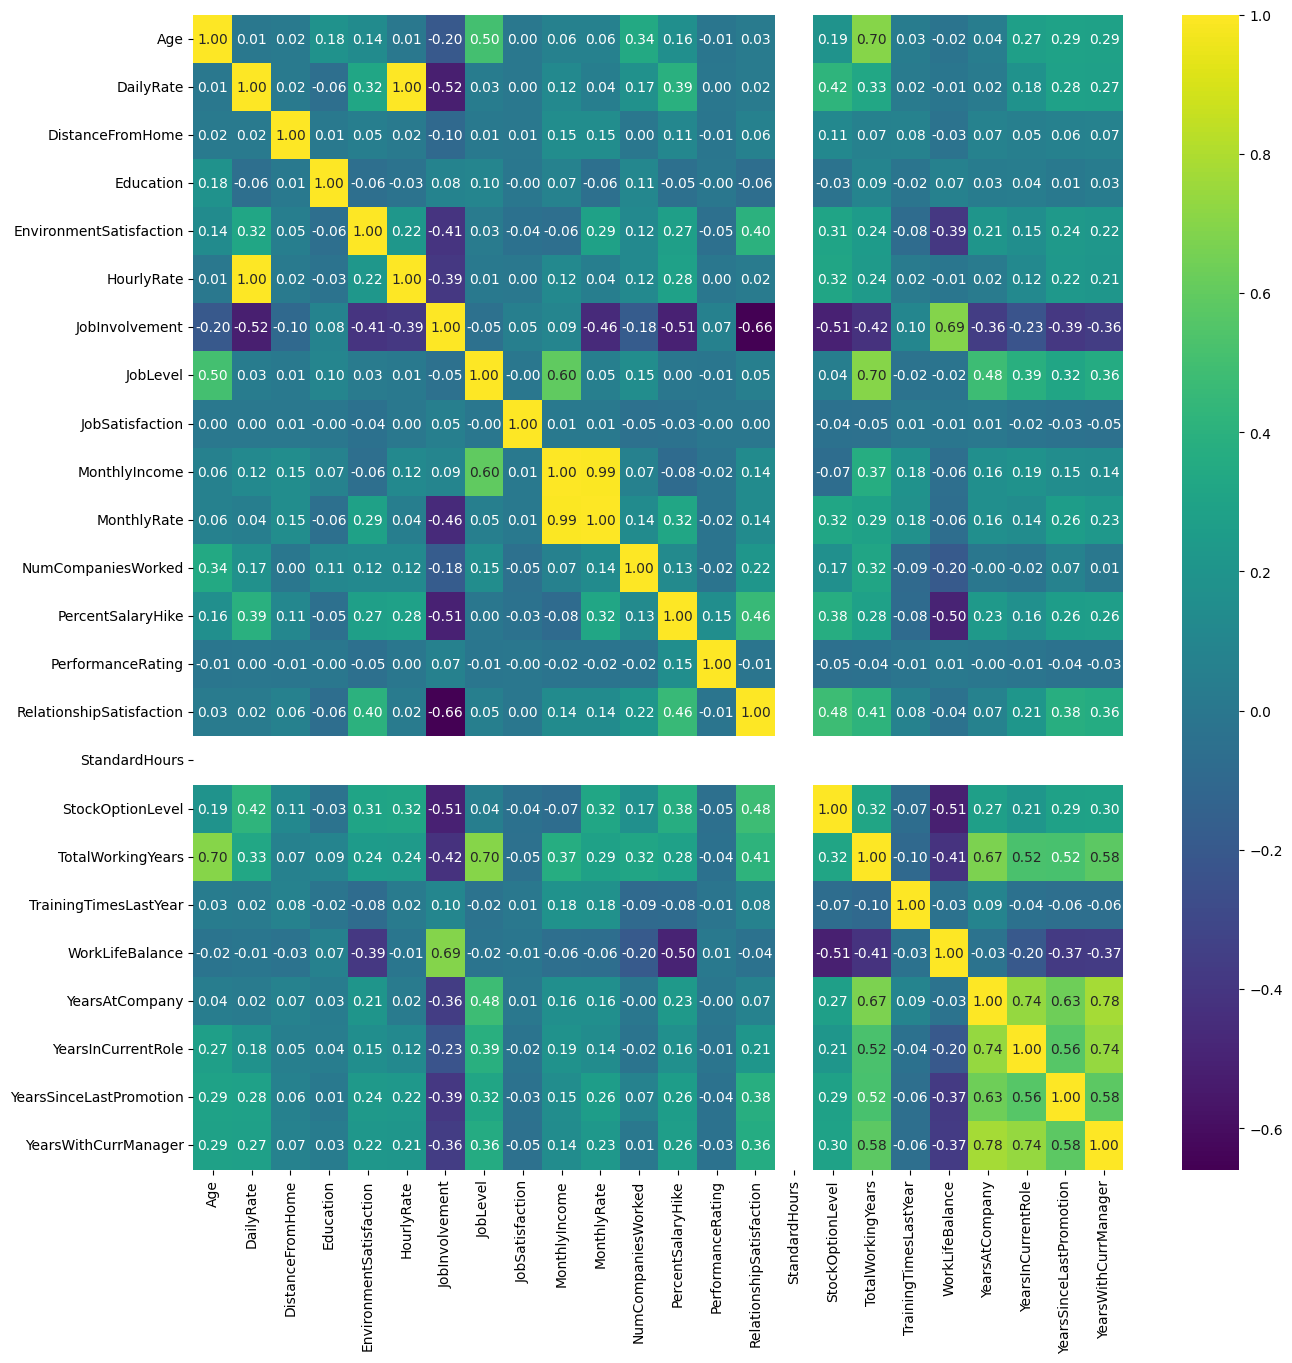

In [ ]:
X=combined_dataset[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=combined_dataset[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

#### The correlation heatmap provides a comprehensive overview of the linear relationships between various numerical features in the dataset.

  1. Strong Positive Correlations:
  Age, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager: These variables show strong positive inter-correlations, forming a distinct darker blue block. This is intuitive, as older employees generally have more total working years, and often more years at the current company, leading to more promotions and longer tenure with their current manager.

  MonthlyIncome and JobLevel: There's a strong positive correlation between MonthlyIncome and JobLevel. This indicates that as an employee's job level increases, their monthly income tends to rise significantly.

  JobLevel, TotalWorkingYears, YearsAtCompany: JobLevel also shows strong positive correlations with TotalWorkingYears and YearsAtCompany, suggesting that higher job levels are typically achieved with more experience and tenure.

  2. Moderate Correlations:
  NumCompaniesWorked and TotalWorkingYears: A moderate negative correlation might be present (though not extremely dark), implying that employees with more total working years might have worked at fewer companies, or vice versa, depending on career trajectories.

  PerformanceRating and MonthlyIncome: While not extremely strong, there might be a slight positive correlation, indicating that higher performance could be associated with higher income.

  3. Weak or Negligible Correlations:
  DailyRate, HourlyRate, MonthlyRate: These rate-based variables show very weak correlations with most other variables, appearing as lighter squares. This suggests that the daily, hourly, or monthly payment rates themselves are largely independent of factors like age, total working years, or job level.

  DistanceFromHome: Generally, DistanceFromHome exhibits weak correlations with most other features, indicating that how far an employee lives from work does not strongly influence other factors like income, age, or job satisfaction.

  Gender, Education, EducationField: These categorical (or ordinal) variables, while present, often show weaker linear correlations with purely numerical continuous variables, as expected.

  Inference:

  The heatmap highlights critical interdependencies, particularly around age, experience, and career progression directly influencing income and job level. Features like daily/hourly rates and distance from home appear to be more independent. This analysis is valuable for understanding the underlying structure of the data and for guiding further modeling efforts, such as identifying potential multicollinearity or selecting relevant features for predicting outcomes like attrition.